In [ ]:
import os

DRIVE_PROJECT_PATH = '/content/drive/MyDrive/traffic_sign'
RUNS_PATH = os.path.join(DRIVE_PROJECT_PATH, 'runs')

os.makedirs(RUNS_PATH, exist_ok=True)
!mkdir -p ./runs
!mount --rbind {RUNS_PATH} ./runs

In [ ]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'

0.038448days (3321.91sec)


In [ ]:
!df -h

df: /content/runs: Transport endpoint is not connected
Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   46G   67G  41% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
tmpfs           6.4G  2.3M  6.4G   1% /var/colab
/dev/sda1        74G   50G   24G  68% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  7.5G  7.6G  50% /content/drive


In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.1Gi       2.7Gi       4.0Mi       8.8Gi        11Gi
Swap:             0B          0B          0B


In [ ]:
!nvidia-smi

Mon Sep 15 05:56:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install --upgrade ultralytics


from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.8/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!gdown 1cIHSV6foHPlEPqsFUzY-0Sg8FNAQe9xd

Downloading...
From (original): https://drive.google.com/uc?id=1cIHSV6foHPlEPqsFUzY-0Sg8FNAQe9xd
From (redirected): https://drive.google.com/uc?id=1cIHSV6foHPlEPqsFUzY-0Sg8FNAQe9xd&confirm=t&uuid=f2e2f60c-1edf-44fa-93e0-fdf67e193e56
To: /content/data.zip
100% 275M/275M [00:04<00:00, 61.1MB/s]


In [ ]:
!unzip data.zip -d data

Archive:  data.zip
replace data/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data/README.dataset.txt  
replace data/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data/README.roboflow.txt  
replace data/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data/data.yaml          
replace data/test/images/IMG_4004-MOV_out0025_png.rf.0588fd977adbf6bb719c3ffd10b5e09d.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data/test/images/IMG_4004-MOV_out0025_png.rf.0588fd977adbf6bb719c3ffd10b5e09d.jpg  
replace data/test/images/IMG_4004-MOV_out0029_png.rf.d0479e2eb7c5296c0148a32ecdfbae3a.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace data/test/images/IMG_4004-MOV_out0029_png.rf.d0479e2eb7c5296c0148a32ecdfbae3a.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Sau đó thay file `data.yaml` mới từ drive

In [27]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

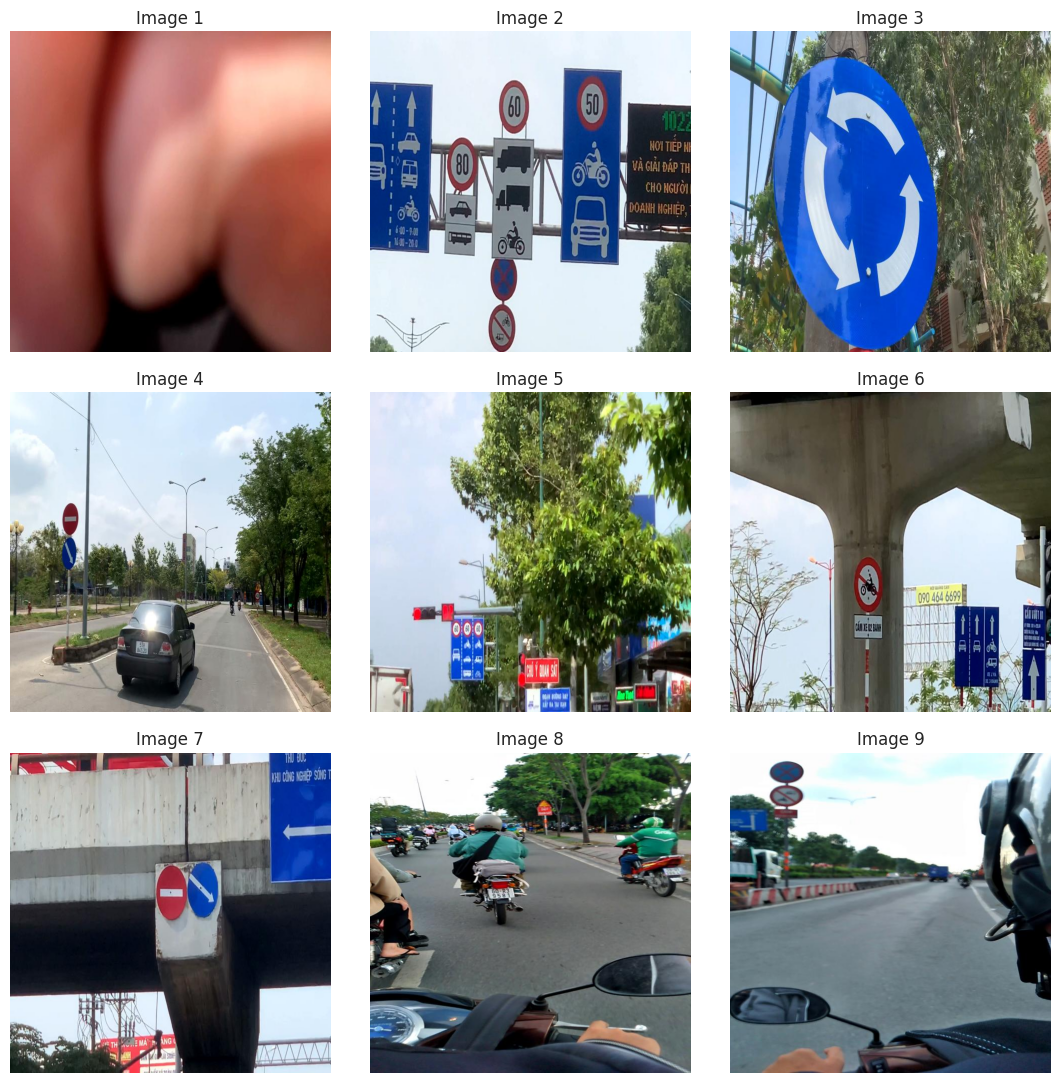

In [12]:
Image_dir = '/content/data/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [23]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [24]:
%cd {HOME}


In [15]:
# Get the size of the image
IMG_FILE = "IMG_4004-MOV_out0001_png.rf.491614737b2efd25164e4b54596b9ce9.jpg"
IMG_PATH = Image_dir / IMG_FILE
image = cv2.imread(str(IMG_PATH))
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.


In [16]:
from torch.serialization import add_safe_globals
import torch
from ultralytics.nn.tasks import DetectionModel
from ultralytics.nn.modules import Conv


from ultralytics import YOLO
model = YOLO("yolov8n.pt")

In [25]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(
    data='/content/data/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7859d5cb1e80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

In [ ]:
model_path = os.path.join(RUNS_PATH,'/detect/train/weights/best.pt')

/content/drive/MyDrive/traffic_sign/runs/detect/train/confusion_matrix_normalized.png


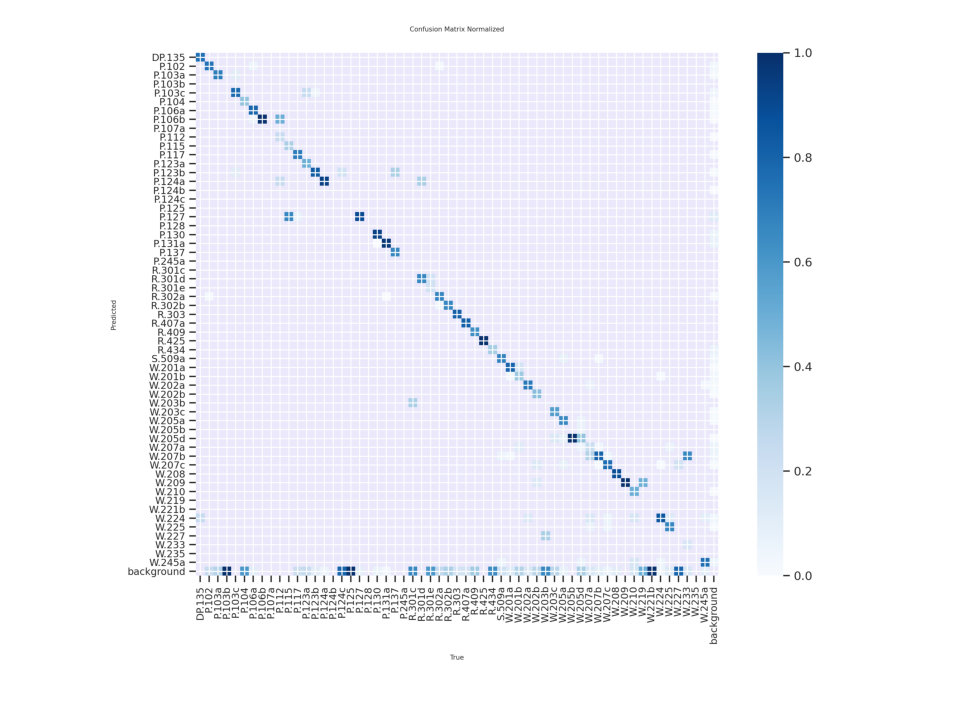

/content/drive/MyDrive/traffic_sign/runs/detect/train/BoxF1_curve.png


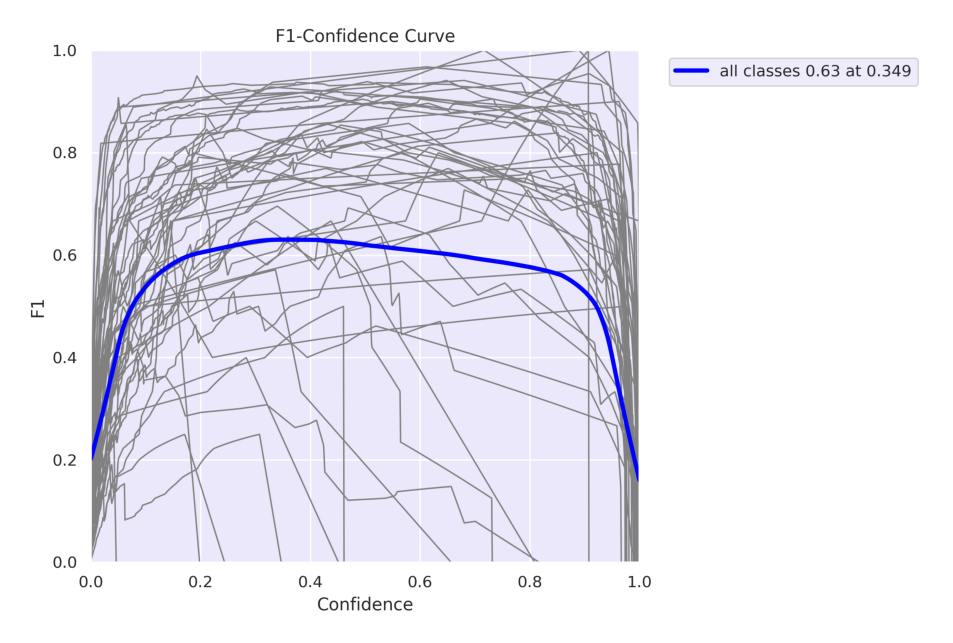

/content/drive/MyDrive/traffic_sign/runs/detect/train/BoxP_curve.png


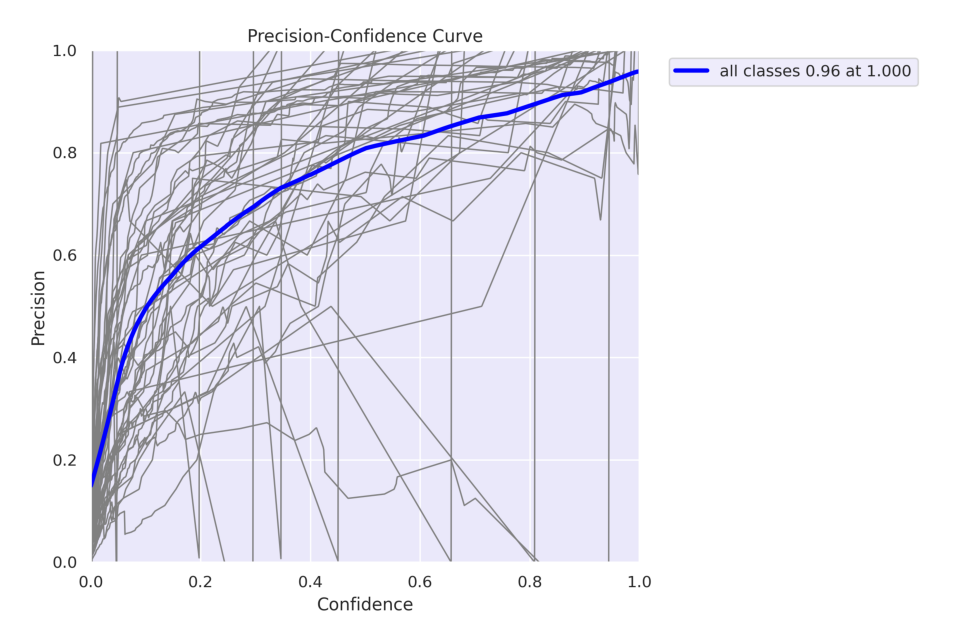

/content/drive/MyDrive/traffic_sign/runs/detect/train/BoxR_curve.png


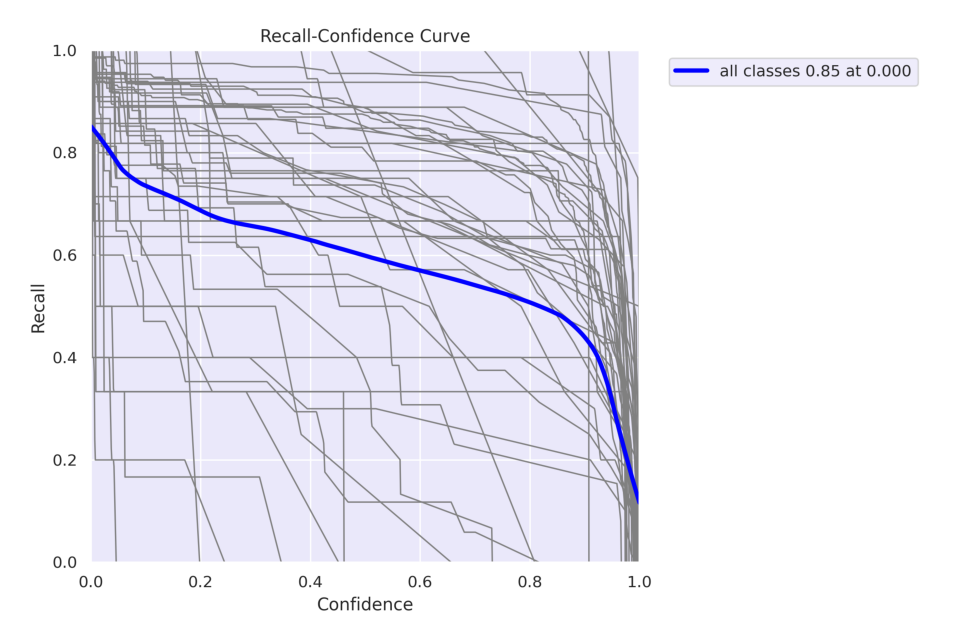

/content/drive/MyDrive/traffic_sign/runs/detect/train/BoxPR_curve.png


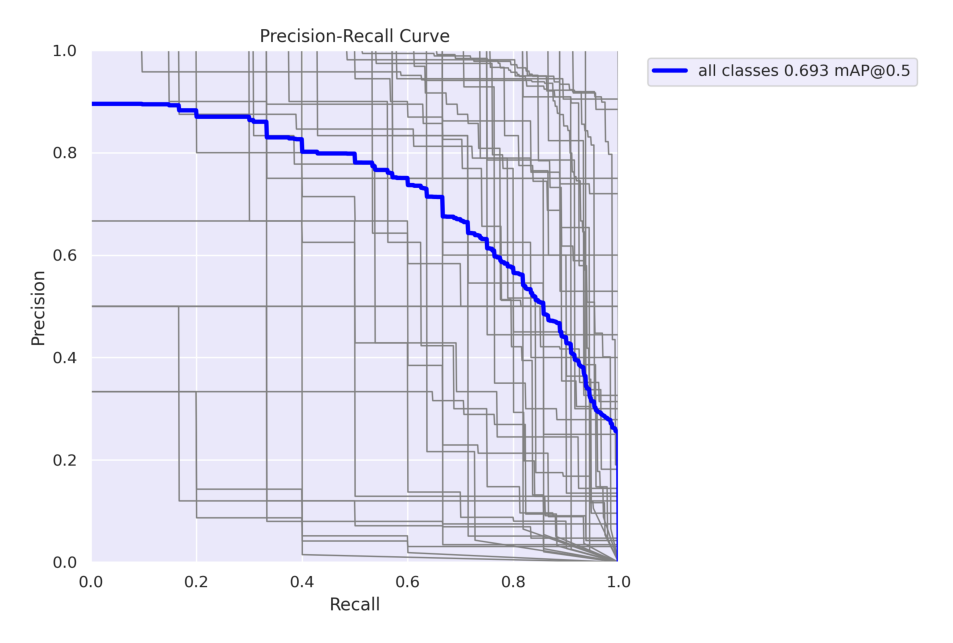

/content/drive/MyDrive/traffic_sign/runs/detect/train/results.png


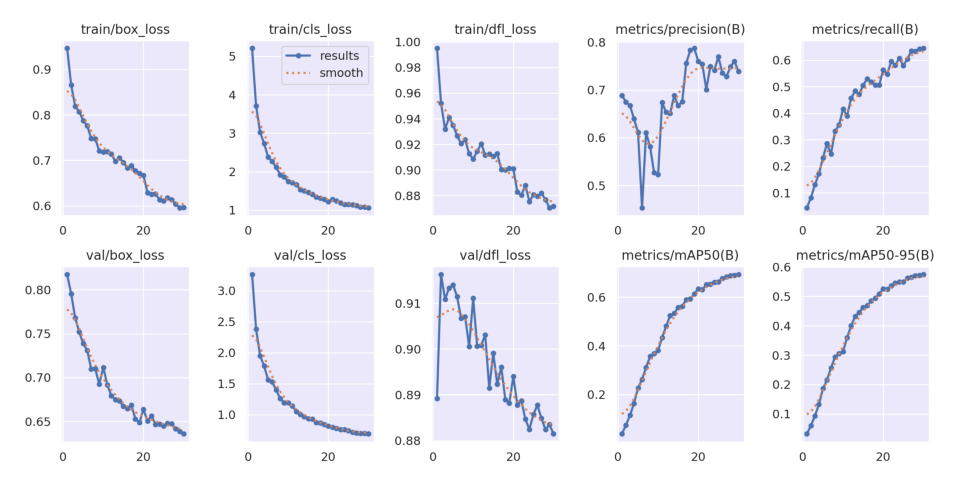

In [29]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'BoxF1_curve.png',
    'BoxP_curve.png',
    'BoxR_curve.png',
    'BoxPR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = os.path.join(RUNS_PATH,'/detect/train')

# Display the images
display_images(post_training_files_path, image_files)

In [30]:
res_path = os.path.join(RUNS_PATH,'/detect/train/results.csv')
Result_Final_model = pd.read_csv(res_path)
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  1003.00         0.62910         1.28501         0.88273   
21     22  1047.01         0.62512         1.24443         0.88037   
22     23  1091.43         0.62640         1.19436         0.88796   
23     24  1137.92         0.61372         1.15019         0.87539   
24     25  1183.14         0.61107         1.14903         0.88057   
25     26  1227.37         0.61746         1.13948         0.87961   
26     27  1271.78         0.61378         1.12235         0.88204   
27     28  1316.36         0.60412         1.07552         0.87670   
28     29  1362.66         0.59607         1.07677         0.87055   
29     30  1409.63         0.59635         1.06461         0.87176   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.75402            0.54754           0.63072   
21               0.70090            0.59481           0.65111   
22               0.74937            0.58033           0.65388   
23               0.74115            0.60715           0.66175   
24               0.76963            0.57926           0.66327   
25               0.73530            0.60433           0.67763   
26               0.72780            0.63375           0.68347   
27               0.74813            0.63356           0.68743   
28               0.76012            0.64217           0.69058   
29               0.73897            0.64435           0.69342   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.52477       0.65054       0.79733       0.88778  0.000055   
21              0.53636       0.65640       0.78146       0.88872  0.000049   
22              0.54513       0.64674       0.75908       0.88469  0.000044   
23              0.54928       0.64679       0.75802       0.88244  0.000039   
24              0.54972       0.64487       0.73898       0.88573  0.000033   
25              0.56202       0.64803       0.71620       0.88773  0.000028   
26              0.56543       0.64747       0.70661       0.88486  0.000023   
27              0.57016       0.64145       0.69953       0.88243  0.000018   
28              0.57130       0.63837       0.69650       0.88350  0.000012   
29              0.57482       0.63591       0.69121       0.88149  0.000007   

      lr/pg1    lr/pg2  
20  0.000055  0.000055  
21  0.000049  0.000049  
22  0.000044  0.000044  
23  0.000039  0.000039  
24  0.000033  0.000033  
25  0.000028  0.000028  
26  0.000023  0.000023  
27  0.000018  0.000018  
28  0.000012  0.000012  
29  0.000007  0.000007

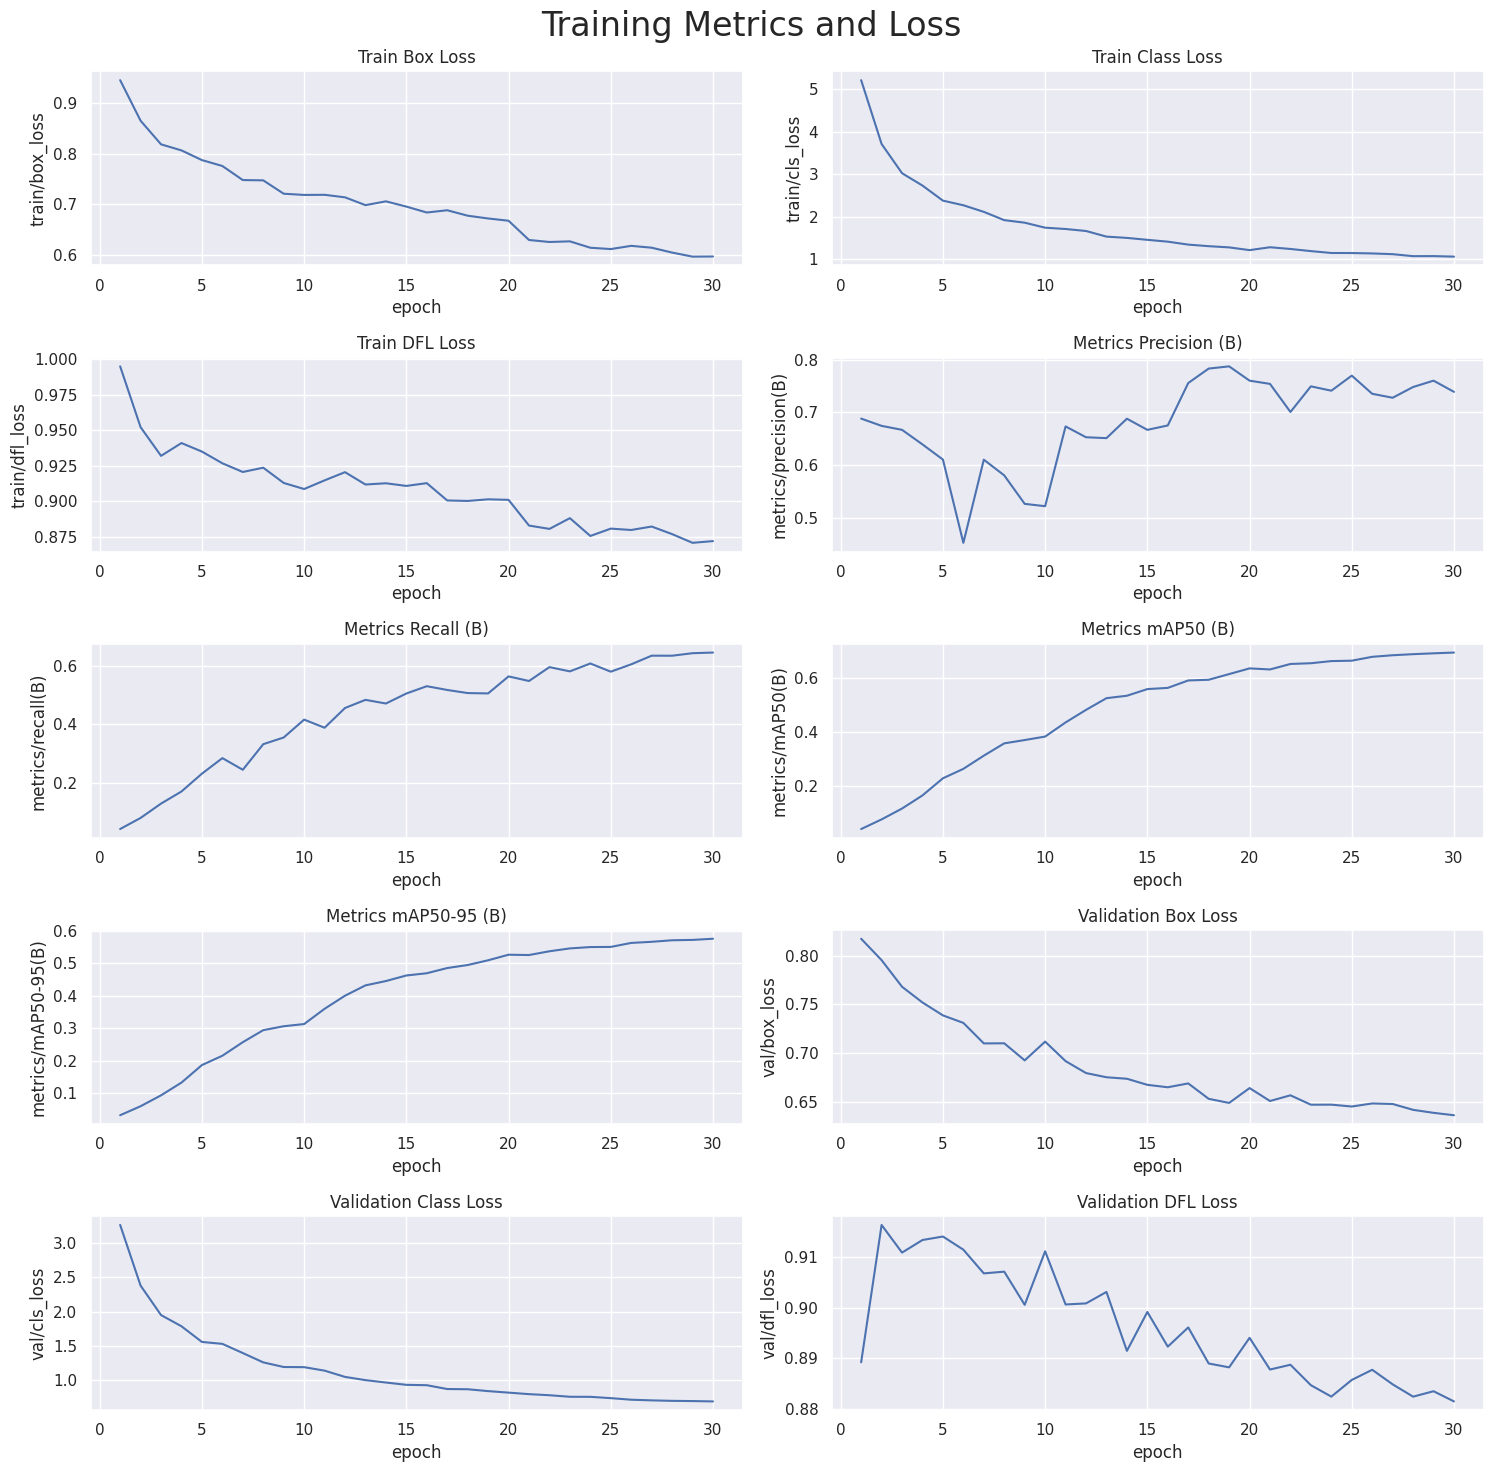

In [31]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

/content
/content


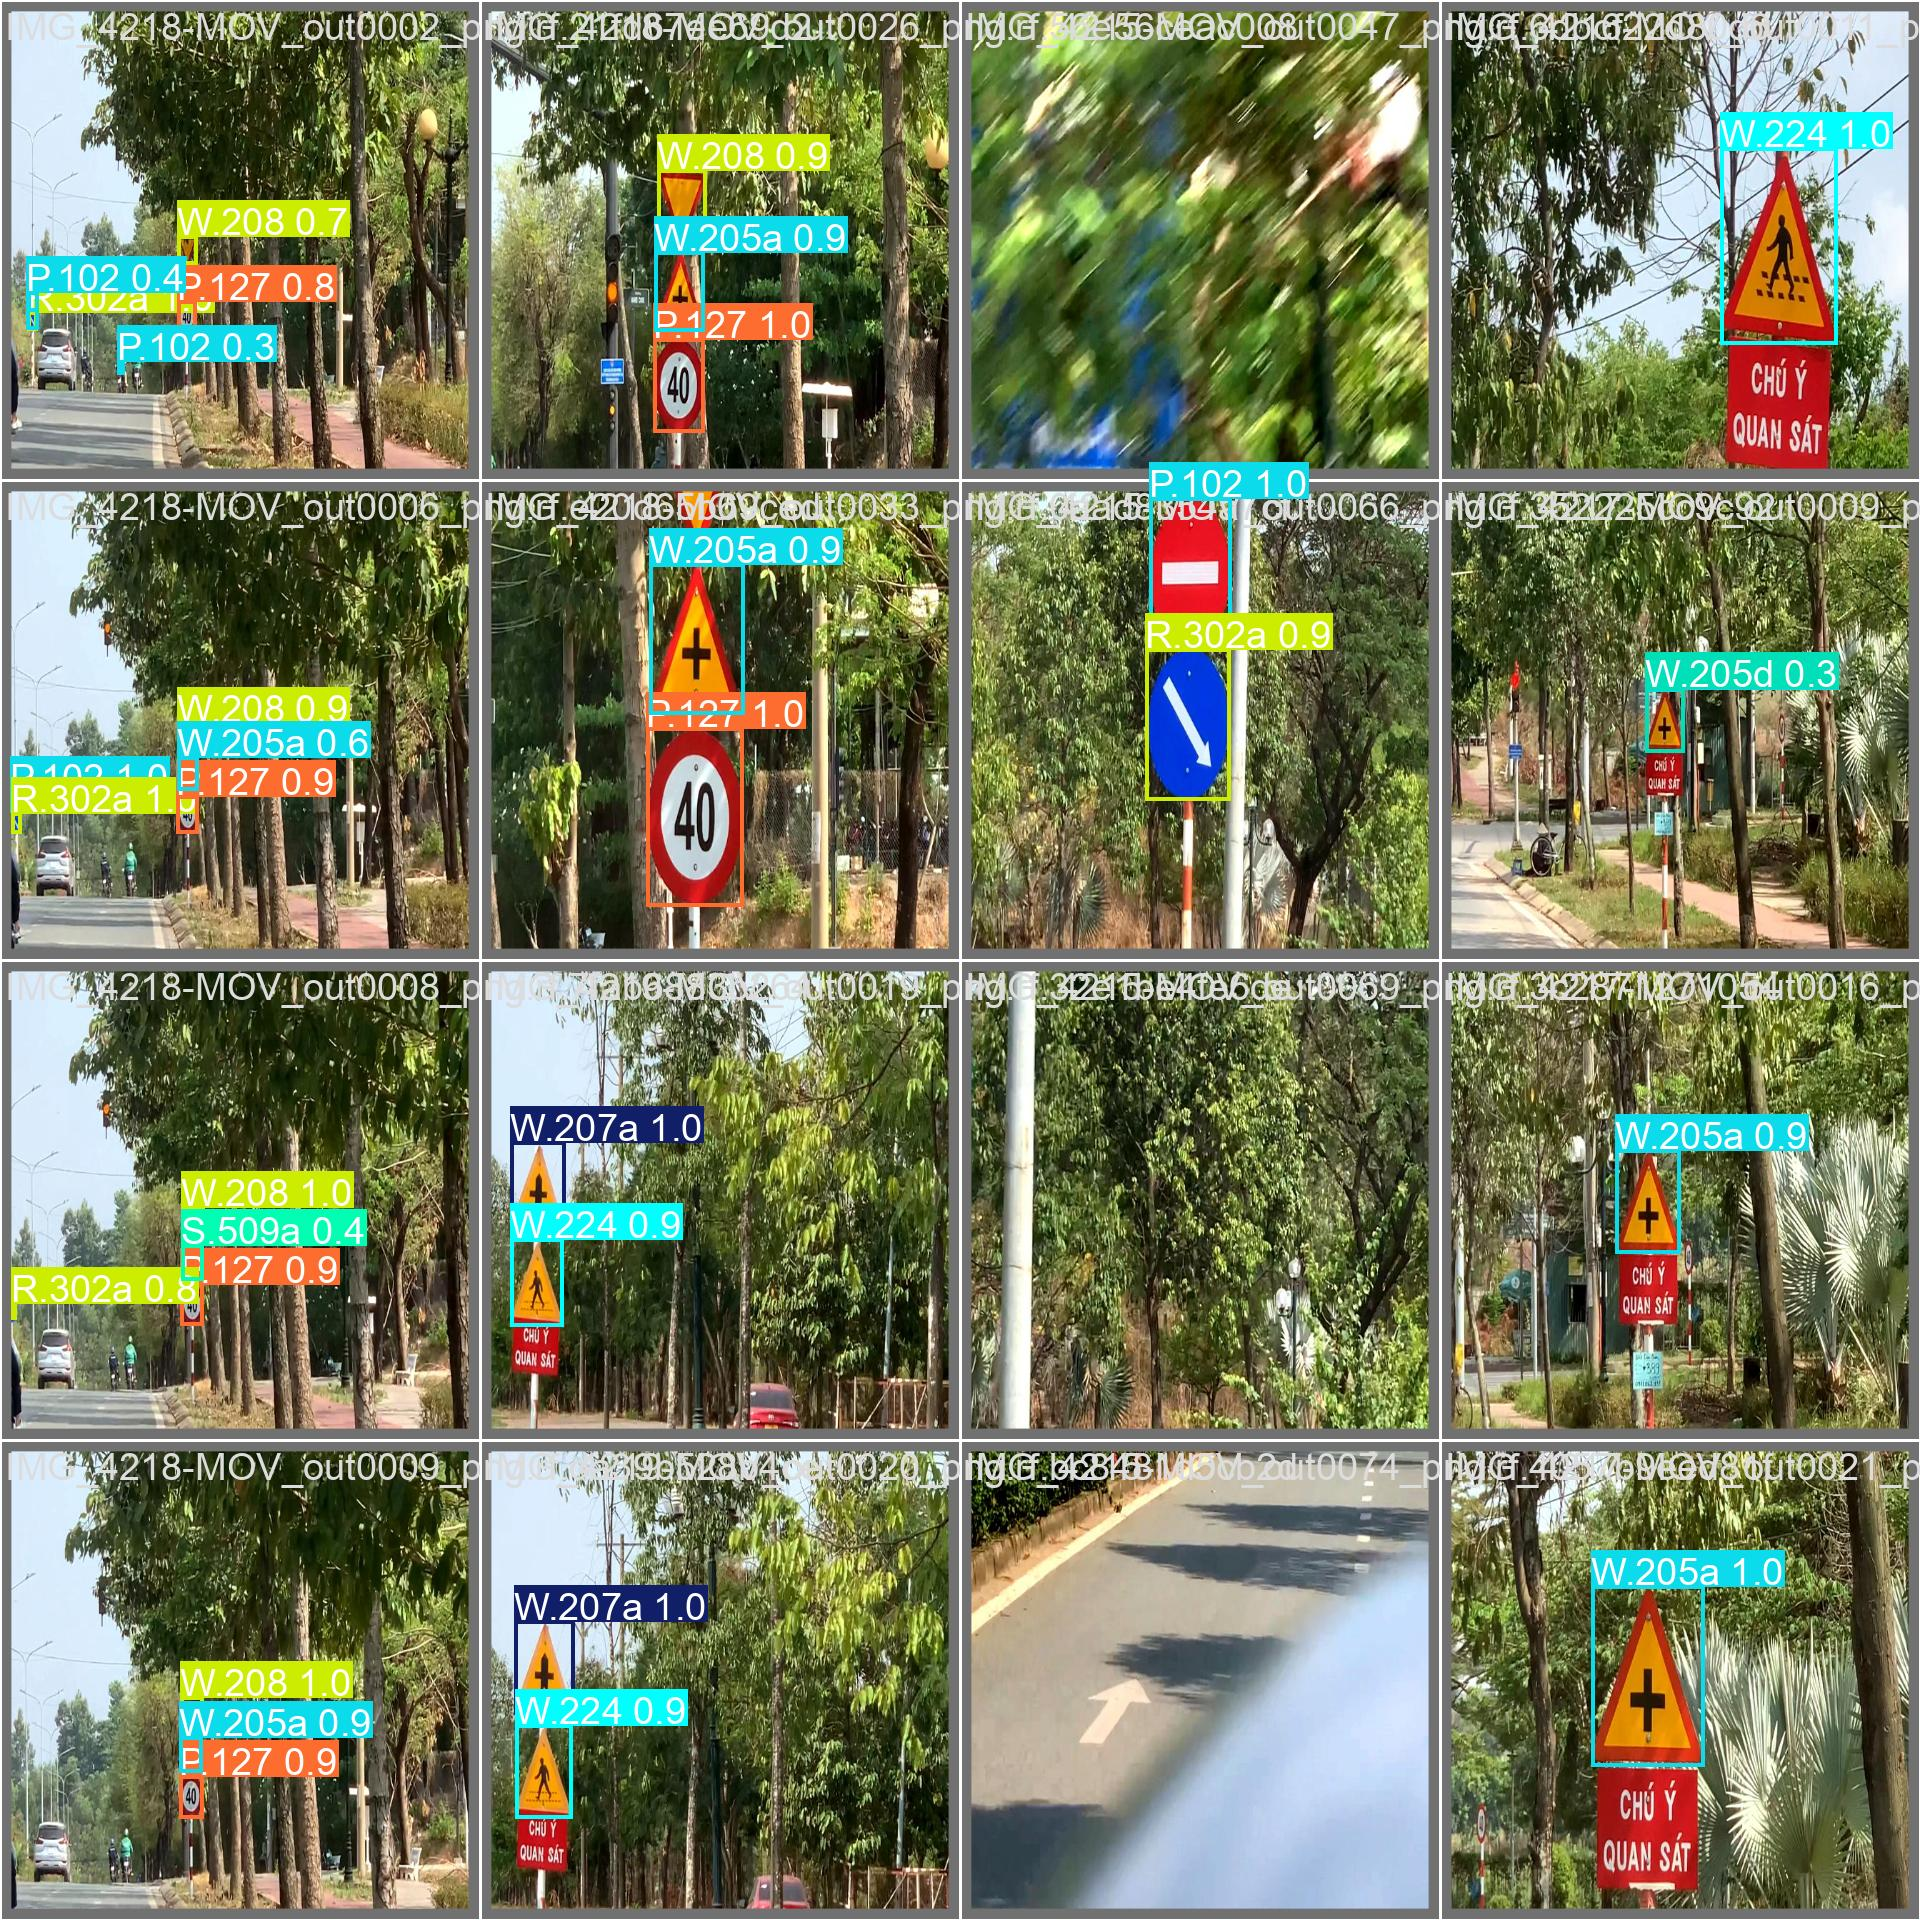

In [32]:
%cd {HOME}
from IPython.display import Image

%cd {HOME}
train_img_path = os.path.join(RUNS_PATH,'/detect/train/val_batch0_pred.jpg')
Image(train_img_path, width=1040)


Valid cho mô hình tốt nhất

In [33]:
from ultralytics import YOLO

# Load model

model = YOLO(model_path)

# Run validation
metrics = model.val(data='/content/data/data.yaml')



Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu128 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,016,958 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 943.1±597.5 MB/s, size: 53.2 KB)
val: Scanning /content/data/valid/labels.cache... 786 images, 169 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 786/786 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 50/50 4.9it/s 10.2s
                   all        786       1251       0.74      0.645      0.693      0.576
                DP.135          4          4      0.867          1      0.995      0.929
                 P.102         48         50      0.905       0.76      0.806      0.647
                P.103a         10         10      0.555        0.7       0.66      0.526
                P.103b          1          1          1          0      0.497      0.448
                P.103c         15         18      0

Confusion matrix cho valid

0.6932686167674742
0.5755765524118736
/content/runs/detect/val/confusion_matrix_normalized.png


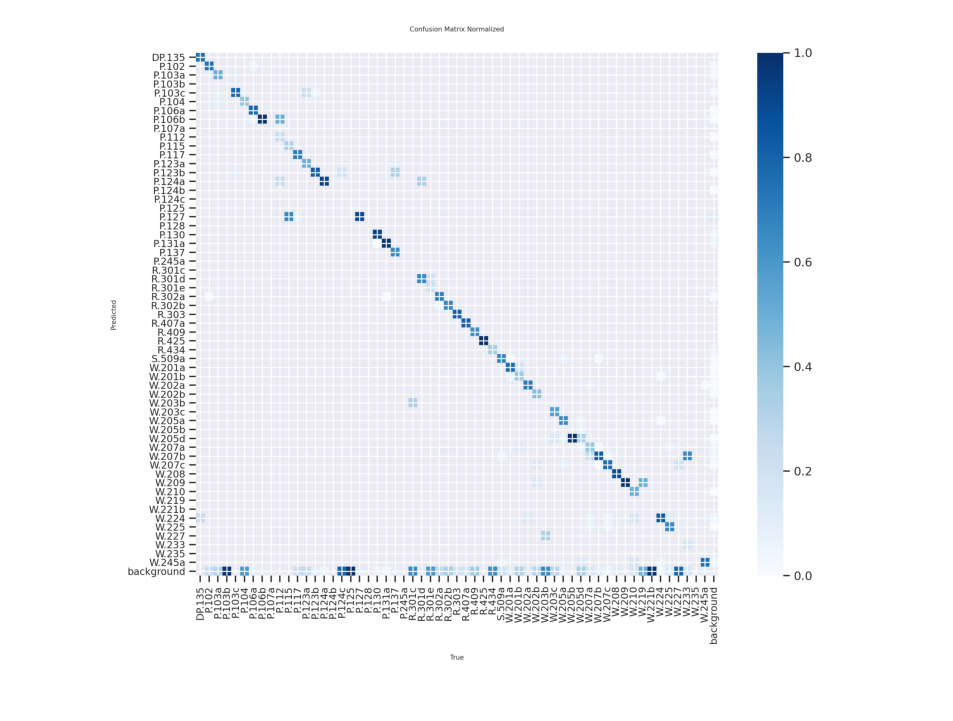

In [37]:
print(metrics.box.map50)       # mAP@0.5
print(metrics.box.map)         # mAP@0.5:0.95
display_images('/content/runs/detect/val',['confusion_matrix_normalized.png'])


##Test mô hình

In [38]:
from ultralytics import YOLO

# Load model
model = YOLO(model_path)

# Run prediction (test)
results = model.predict(
    source='/content/data/test/images',  # Đường dẫn ảnh/thư mục
    conf=0.25,                           # Ngưỡng confidence
    save=True                            # Lưu ảnh output với bounding box
)



image 1/614 /content/data/test/images/IMG_4004-MOV_out0025_png.rf.0588fd977adbf6bb719c3ffd10b5e09d.jpg: 640x640 1 P.102, 1 R.302a, 7.8ms
image 2/614 /content/data/test/images/IMG_4004-MOV_out0029_png.rf.d0479e2eb7c5296c0148a32ecdfbae3a.jpg: 640x640 2 P.102s, 1 R.302a, 14.3ms
image 3/614 /content/data/test/images/IMG_4004-MOV_out0044_png.rf.30baabee8a4bb798e4b50011d4d8e08c.jpg: 640x640 1 P.102, 1 R.302a, 15.6ms
image 4/614 /content/data/test/images/IMG_4005-MOV_out0031_png.rf.5d6344eac005efc1dc80a9d5ffaeb175.jpg: 640x640 1 P.102, 1 R.302a, 12.9ms
image 5/614 /content/data/test/images/IMG_4005-MOV_out0050_png.rf.9f08b9bc4a88e678b1132b1f084e2845.jpg: 640x640 1 P.102, 1 R.302a, 12.8ms
image 6/614 /content/data/test/images/IMG_4005-MOV_out0057_png.rf.91abaf8605a027b54b4edeb1a5ec19d9.jpg: 640x640 1 P.102, 1 R.302a, 13.3ms
image 7/614 /content/data/test/images/IMG_4005-MOV_out0058_png.rf.481088aad366a59d242153b6f9d4fd06.jpg: 640x640 2 P.102s, 1 R.302a, 8.1ms
image 8/614 /content/data/test/im

Hiển thị ảnh được predict từ mô hình

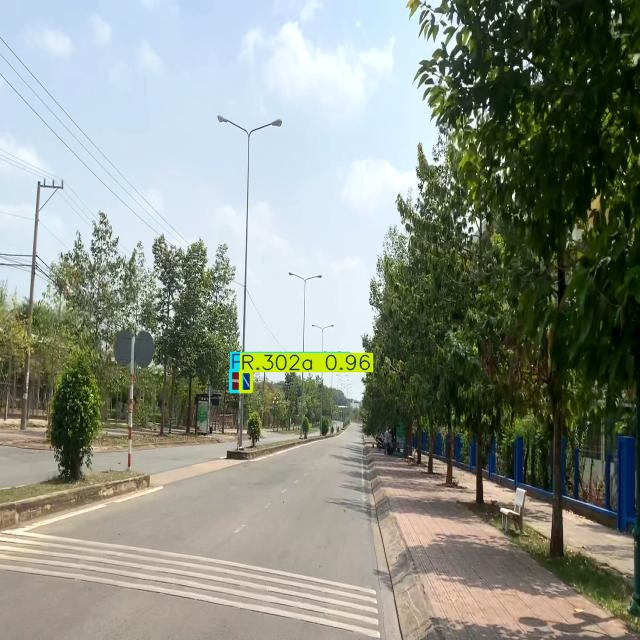

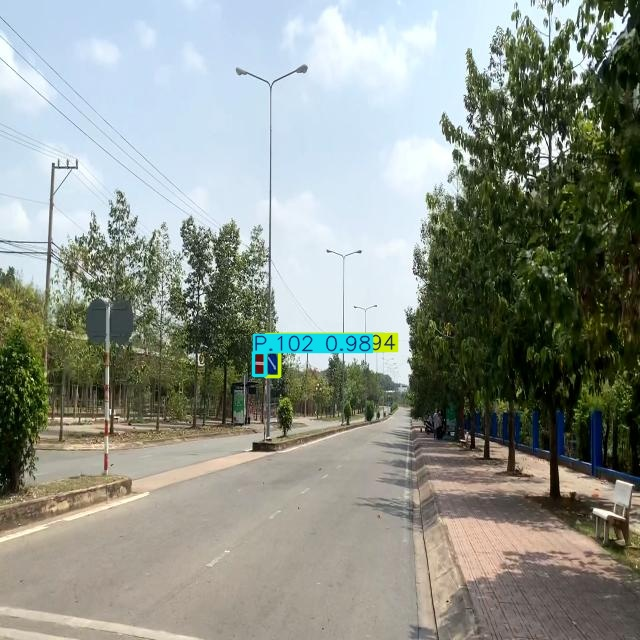

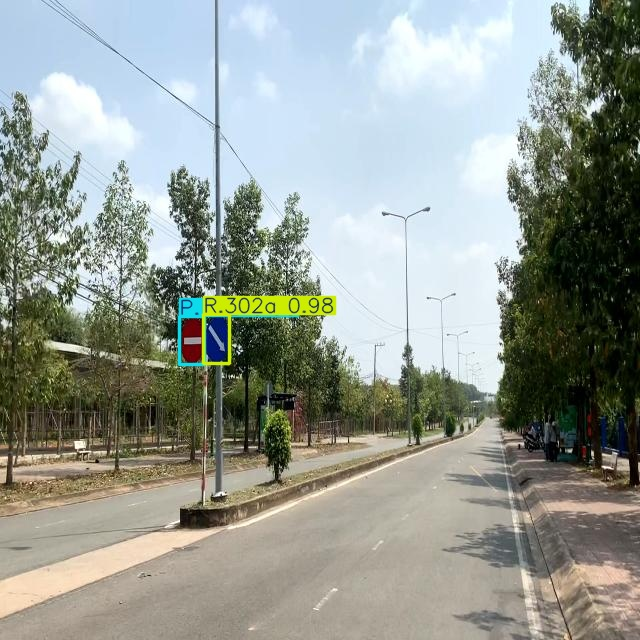

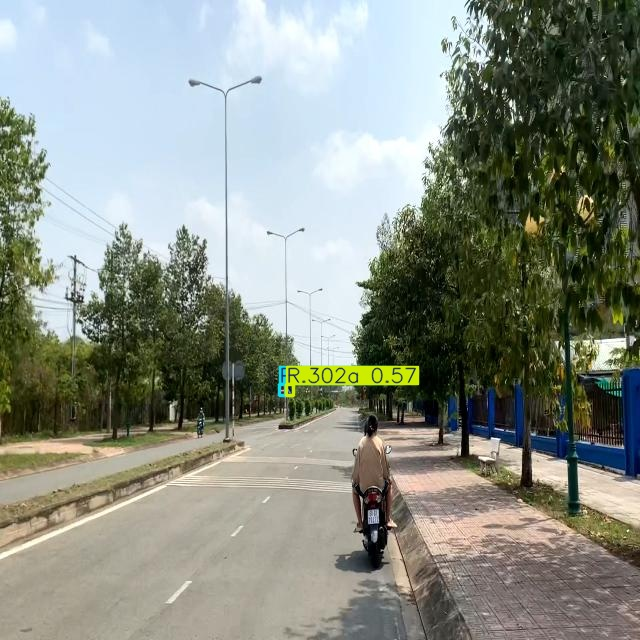

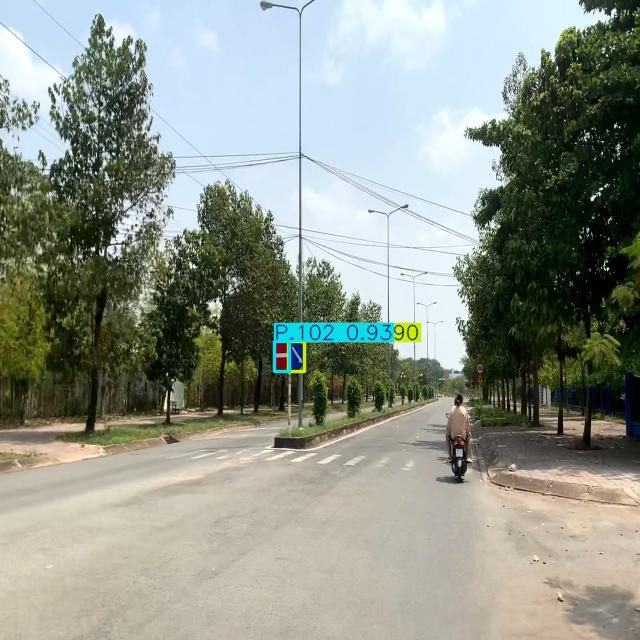

In [39]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:5]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

Tải 1 hình random và chạy thử


In [ ]:
!gdown 1Dj89-Nl9bFjxb8Yra5cv9W4wCme2PdJm

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/sample_test.jpg save=True

In [ ]:
Image('/content/sample_test.jpg',width = 400)

In [ ]:
Image('/content/runs/detect/predict/sample_test.jpg',width = 400)

##Load mô hình đã lưu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model= YOLO("/content/drive/MyDrive/traffic_sign/runs/detect/train/weights/best.pt")

In [ ]:
model.predict("/content/randVID.mp4", save=True)

##Deploy mô hình

In [ ]:
!pip install roboflow

In [ ]:
import roboflow
roboflow.login()
rf = roboflow.Roboflow()

project = rf.workspace("projectxla").project("vn_traffic_2")

In [ ]:
print(project.version(1))

In [ ]:
import torch
#model = project.version(1).modelmap_location=torch.device('cpu')
project.version(1).deploy("yolov8","/content/drive/MyDrive/traffic_sign", "best.pt" )

In [ ]:
print(project.version)